# Drinking Team

(Agregar descripcion del proyecto)

# Capitulo 1 - Recoleccion de datos y analisis de DataSets

In [3]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
url = 'https://drive.google.com/uc?export=download&id=1h3We42lIDv8lqY0siWLXo5MMwgrGrt6J'
inventario_inicial = pd.read_csv(url)

url = 'https://drive.google.com/uc?export=download&id=13oLTpxnY7CRd9iR604N8kfKvmbBla8VG'
inventario_final = pd.read_csv(url)

url = 'https://drive.usercontent.google.com/download?id=1Id7ERr7pXVJCfempvpEzseJ8WPF_Hs5j&export=download&authuser=0&confirm=t&uuid=3f33a3fd-2696-4250-b026-b62f6c445e4a&at=APZUnTUbyMP2tLICvQCO15n8Z4fY%3A1723646561085'
compras = pd.read_csv(url)

url = 'https://drive.usercontent.google.com/download?id=1QvW3YxNzlQy9FbBZuil6VlE2ZQSIPC4o&export=download&authuser=0&confirm=t&uuid=277da297-06fa-4d0e-9cc4-8e607e577846&at=APZUnTWdj6JrNn6b7VQ9vwcoCaZN%3A1723646612159'
ventas = pd.read_csv(url)

In [14]:
# Abrimos los archivos .csv
inventario_inicial = pd.read_csv('https://drive.google.com/uc?export=download&id=1h3We42lIDv8lqY0siWLXo5MMwgrGrt6J')
inventario_final = pd.read_csv('https://drive.google.com/uc?export=download&id=13oLTpxnY7CRd9iR604N8kfKvmbBla8VG')
compras = pd.read_csv('https://drive.usercontent.google.com/download?id=1Id7ERr7pXVJCfempvpEzseJ8WPF_Hs5j&export=download&authuser=0&confirm=t&uuid=3f33a3fd-2696-4250-b026-b62f6c445e4a&at=APZUnTUbyMP2tLICvQCO15n8Z4fY%3A1723646561085')
ventas = pd.read_csv('https://drive.usercontent.google.com/download?id=1QvW3YxNzlQy9FbBZuil6VlE2ZQSIPC4o&export=download&authuser=0&confirm=t&uuid=277da297-06fa-4d0e-9cc4-8e607e577846&at=APZUnTWdj6JrNn6b7VQ9vwcoCaZN%3A1723646612159')

## Vemos la informacion que contiene cada dataset

### Analizamos inventario_inicial

In [15]:
inventario_inicial.head(5)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [16]:
inventario_inicial.info

<bound method DataFrame.info of                InventoryId  Store          City  Brand  \
0        1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1        1_HARDERSFIELD_60      1  HARDERSFIELD     60   
2        1_HARDERSFIELD_62      1  HARDERSFIELD     62   
3        1_HARDERSFIELD_63      1  HARDERSFIELD     63   
4        1_HARDERSFIELD_72      1  HARDERSFIELD     72   
...                    ...    ...           ...    ...   
206524  79_BALLYMENA_46985     79     BALLYMENA  46985   
206525  79_BALLYMENA_47014     79     BALLYMENA  47014   
206526  79_BALLYMENA_47090     79     BALLYMENA  47090   
206527  79_BALLYMENA_90011     79     BALLYMENA  90011   
206528  79_BALLYMENA_90089     79     BALLYMENA  90089   

                         Description   Size  onHand   Price   startDate  
0        Gekkeikan Black & Gold Sake  750mL       8   12.99  2016-01-01  
1             Canadian Club 1858 VAP  750mL       7   10.99  2016-01-01  
2           Herradura Silver Tequila  750mL      

In [17]:
inventario_inicial.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')

Para saber mas sobre esta tabla vamos a analizar la columna startDate


In [18]:
fecha_mas_vieja = inventario_inicial['startDate'].min()
fecha_mas_nueva = inventario_inicial['startDate'].max()
print(fecha_mas_nueva)
print(fecha_mas_vieja)


2016-01-01
2016-01-01


Vamos a asegurarnos que son todas las mismas fechas

In [19]:
unique_dates_count = inventario_inicial['startDate'].nunique()
print(f"Número de fechas únicas: {unique_dates_count}")

Número de fechas únicas: 1


Efectivamente esta tabla indica el inventario existente al 2016-01-01

Posee 206529 rows x 9 columns

Sus columnas son: ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size','onHand', 'Price', 'startDate']

La columna InventoryId podria ser utilizada como key

### Ahora analizaremos inventario_final para asegurarnos que es el inventario a una fecha final 

In [20]:
inventario_final.head(5)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [21]:
inventario_final.info

<bound method DataFrame.info of               InventoryId  Store          City  Brand  \
0       1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1       1_HARDERSFIELD_62      1  HARDERSFIELD     62   
2       1_HARDERSFIELD_63      1  HARDERSFIELD     63   
3       1_HARDERSFIELD_72      1  HARDERSFIELD     72   
4       1_HARDERSFIELD_75      1  HARDERSFIELD     75   
...                   ...    ...           ...    ...   
224484  81_PEMBROKE_90087     81      PEMBROKE  90087   
224485  81_PEMBROKE_90088     81      PEMBROKE  90088   
224486  81_PEMBROKE_90089     81      PEMBROKE  90089   
224487  81_PEMBROKE_90090     81      PEMBROKE  90090   
224488  81_PEMBROKE_90604     81      PEMBROKE  90604   

                         Description   Size  onHand   Price     endDate  
0        Gekkeikan Black & Gold Sake  750mL      11   12.99  2016-12-31  
1           Herradura Silver Tequila  750mL       7   36.99  2016-12-31  
2         Herradura Reposado Tequila  750mL       7   38.99  

In [22]:
inventario_final.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')

In [23]:
unique_dates_count = inventario_final['endDate'].nunique()

print(f"Número de fechas únicas: {unique_dates_count}")

Número de fechas únicas: 1


Efectivamente esta tabla indica el inventario existente al 2016-01-01

Posee 224489 rows x 9 columns

Sus columnas son: 'InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate'

La columna InventoryId podria ser utilizada como key

Las filas no cohinciden con el numero de inventario_inicial

### Ahora veamos compras

In [24]:
compras.head(5)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [25]:
compras.info

<bound method DataFrame.info of                   InventoryId  Store  Brand                   Description  \
0           69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno   
1            30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide   
2           34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced   
3         1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide   
4           76_DONCASTER_2034     76   2034     Glendalough Double Barrel   
...                       ...    ...    ...                           ...   
2372469     49_GARIGILL_22298     49  22298       Zorvino Vyds Sangiovese   
2372470  1_HARDERSFIELD_19556      1  19556    Zorvino Bacca Z Blackberry   
2372471   66_EANVERNESS_22297     66  22297            Zorvino Vyds Pearz   
2372472    69_MOUNTMEND_19557     69  19557  Zorvino Fragole Z Strawberry   
2372473    55_DRY GULCH_22298     55  22298       Zorvino Vyds Sangiovese   

          Size  VendorNumber               

In [26]:
compras.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

compras = pd.read_csv('PurchasesFINAL12312016.csv'):
Indica las compras hechas por la empresa

Posee 2372474 rows x 16 columns

Sus columnas son : 'InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'

Vemos que existen columnas similares con otras tablas como 'InventoryId', 'PONumber', 'PODate', 'PayDate'. 
Ver si estas cohinciden con las otras tablas 


### Ahora veamos Ventas

In [27]:
ventas.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [28]:
ventas.info

<bound method DataFrame.info of                  InventoryId  Store  Brand                 Description  \
0        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
1        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
2        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
3        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
4        1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack   
...                      ...    ...    ...                         ...   
1048570  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048571  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048572  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048573  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048574  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   

               Size  SalesQuantity  SalesDollars  SalesPrice  SalesDate  \
0   

In [29]:
ventas.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

ventas: Indica las ventas realizadas

Posee 1048575 rows x 14 columns

Sus columnas son: 'InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'

# Capitulo 2 -  Busqueda y limpieza de valores nulos y duplicados
# Función para verificar valores nulos y vacíos

In [30]:
def check_missing_values(df, name):
    print(f"\nDataset: {name}")
    print("Valores nulos en cada columna:")
    print(df.isnull().sum())
    
    print("\nValores vacíos en cada columna:")
    print(df.apply(lambda x: x.str.strip().eq('').sum() if x.dtype == "object" else 0))

# Verificar los valores nulos y vacíos en cada dataset
check_missing_values(inventario_inicial, 'inventario_inicial')
check_missing_values(inventario_final, 'inventario_final')
check_missing_values(compras, 'compras')
check_missing_values(ventas, 'ventas')


Dataset: inventario_inicial
Valores nulos en cada columna:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

Valores vacíos en cada columna:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

Dataset: inventario_final
Valores nulos en cada columna:
InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

Valores vacíos en cada columna:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

Dataset: compras
Valores nulos en cada columna:
InventoryId       0
Store             0
Brand             0
Description     

In [31]:
# Lista de tus datasets y sus nombres
datasets = [
            (inventario_inicial, 'inventario_inicial'),
            (inventario_final, 'inventario_final'),
            (compras, 'compras'),
            (ventas, 'ventas')]

# Ciclo para iterar sobre cada dataset y buscar filas con valores nulos
for df, name in datasets:
    print(f"\nDataset: {name}")
    filas_nulas = df[df.isnull().any(axis=1)]
    if not filas_nulas.empty:
        print(f"Filas con valores nulos en {name}:")
        print(filas_nulas)
    else:
        print(f"No se encontraron filas con valores nulos en {name}.")


Dataset: inventario_inicial
No se encontraron filas con valores nulos en inventario_inicial.

Dataset: inventario_final
Filas con valores nulos en inventario_final:
       InventoryId  Store City  Brand                   Description   Size  \
113895      46__58     46  NaN     58   Gekkeikan Black & Gold Sake  750mL   
113896      46__62     46  NaN     62      Herradura Silver Tequila  750mL   
113897      46__63     46  NaN     63    Herradura Reposado Tequila  750mL   
113898      46__77     46  NaN     77   Three Olives Espresso Vodka  750mL   
113899     46__106     46  NaN    106      Mr Boston Peach Schnapps  Liter   
...            ...    ...  ...    ...                           ...    ...   
115174   46__46447     46  NaN  46447         Gascon Malbec Mendoza  750mL   
115175   46__46458     46  NaN  46458      Layer Cake Barosa Shiraz  750mL   
115176   46__46476     46  NaN  46476          Tilia Malbec Mendoza  750mL   
115177   46__46764     46  NaN  46764  Clayhouse Adobe

In [32]:
for df, name in datasets:
    print(f"\nDataset: {name}")
    total_nulos = df.isnull().sum().sum()  # Suma total de valores nulos en el dataset
    print(f"Total de valores nulos en {name}: {total_nulos}")


Dataset: inventario_inicial
Total de valores nulos en inventario_inicial: 0

Dataset: inventario_final
Total de valores nulos en inventario_final: 1284

Dataset: compras
Total de valores nulos en compras: 3

Dataset: ventas
Total de valores nulos en ventas: 0


## Limpieza de los DataFrame

### Ahora veamos los valores nulos de inventario_final

In [33]:
# Obtener los valores únicos en la columna 'City'
valores_unicos_city = inventario_final['City'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'City':")
print(valores_unicos_city)

# Contar cuántos valores únicos hay
print(f"\nNúmero total de valores únicos en 'City': {len(valores_unicos_city)}")

Valores únicos en la columna 'City':
['HARDERSFIELD' 'ASHBORNE' 'HORNSEY' 'EANVERNESS' 'SUTTON' 'GOULCREST'
 'STANMORE' 'ALNERWICK' 'BLACKPOOL' 'CARDEND' 'LEESIDE' 'TARMSWORTH'
 'BROMWICH' 'WANBORNE' 'LUNDY' 'OLDHAM' 'FURNESS' 'WINTERVALE'
 'BREDWARDINE' 'BALERNO' 'SHARNWICK' 'ARBINGTON' 'PALPERROTH' 'CAERSHIRE'
 "KNIFE'S EDGE" 'MOUNTMEND' 'LARNWICK' 'AYLESBURY' 'CULCHETH' 'PITMERDEN'
 'HALIVAARA' 'LEWES' 'PAETHSMOUTH' 'EASTHALLOW' 'BULLMAR' 'BLACK HOLLOW'
 'WOLFORD' 'PORTHCRAWL' 'VERITAS' nan "PELLA'S WISH" 'NORFOLK' 'GARIGILL'
 'ABERDEEN' 'GRAYCOTT' 'HILLFAR' 'GUTHRAM' 'DRY GULCH' "BEGGAR'S HOLE"
 'LANTEGLOS' 'HARTLEPOOL' 'CLAETHORPES' 'IRRAGIN' 'AETHELNEY' 'KILMARNOCK'
 'SWORDBREAK' 'CESTERFIELD' 'LUTON' 'SOLARIS' 'KELD' 'CLARCTON'
 'DONCASTER' 'PAENTMARWY' 'BARNCOMBE' 'TAMWORTH' 'EASTHAVEN' 'BALLYMENA'
 'PEMBROKE']

Número total de valores únicos en 'City': 68


Decidimos rellerar los valores nulos en City con 'Desconocido' par no eliminar ni rellenar con informacion erronea

In [34]:
inventario_final['City'].fillna('Desconocido', inplace=True)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_37748\129095551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inventario_final['City'].fillna('Desconocido', inplace=True)


### Ahora veamos el dataset 'compras'

In [35]:
# Rellenar los valores NaN en la columna 'Size' con 'Desconocido'
compras['Size'].fillna('Desconocido', inplace=True)

# Verificar que los valores NaN han sido reemplazados
print(compras['Size'].isnull().sum())

0


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_37748\2708867146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  compras['Size'].fillna('Desconocido', inplace=True)


Decidimo rellenar los datos vacios con 'Desconocido' para na afectar los datos geograficos legitimos

### Verifiquemos si queda algun Nulo

In [36]:
# Lista de tus datasets y sus nombres
datasets = [
            (inventario_inicial, 'inventario_inicial'),
            (inventario_final, 'inventario_final'),
            (compras, 'compras'),
            (ventas, 'ventas')]

for df, name in datasets:
    print(f"\nDataset: {name}")
    total_nulos = df.isnull().sum().sum()  # Suma total de valores nulos en el dataset
    print(f"Total de valores nulos en {name}: {total_nulos}")


Dataset: inventario_inicial
Total de valores nulos en inventario_inicial: 0

Dataset: inventario_final
Total de valores nulos en inventario_final: 0

Dataset: compras
Total de valores nulos en compras: 0

Dataset: ventas
Total de valores nulos en ventas: 0


Exito!!!

### Configuracion de fechas

Nos aseguramos que las columnas de fechas esten con el formato datetime

In [37]:
# Convertir la columna 'startDate' a datetime
inventario_inicial['startDate'] = pd.to_datetime(inventario_inicial['startDate'], errors='coerce')

# Verificar los tipos de datos para asegurarse de que 'startDate' es datetime64
print(inventario_inicial.dtypes)

InventoryId            object
Store                   int64
City                   object
Brand                   int64
Description            object
Size                   object
onHand                  int64
Price                 float64
startDate      datetime64[ns]
dtype: object


In [38]:
# Convertir la columna 'startDate' a datetime
inventario_final['endDate'] = pd.to_datetime(inventario_final['endDate'], errors='coerce')

# Verificar los tipos de datos para asegurarse de que 'startDate' es datetime64
print(inventario_final.dtypes)

InventoryId            object
Store                   int64
City                   object
Brand                   int64
Description            object
Size                   object
onHand                  int64
Price                 float64
endDate        datetime64[ns]
dtype: object


In [39]:
# Convertir las columnas de fecha a datetime
compras['PODate'] = pd.to_datetime(compras['PODate'], errors='coerce')
compras['ReceivingDate'] = pd.to_datetime(compras['ReceivingDate'], errors='coerce')
compras['InvoiceDate'] = pd.to_datetime(compras['InvoiceDate'], errors='coerce')
compras['PayDate'] = pd.to_datetime(compras['PayDate'], errors='coerce')

# Verificar los tipos de datos para asegurarse de que las columnas son datetime64
print(compras.dtypes)

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object


In [40]:
# Convertir las columnas de fecha a datetime
ventas['SalesDate'] = pd.to_datetime(ventas['SalesDate'], errors='coerce')

Verificamos la existencia de datos duplicados

In [3]:
print("Duplicados en inventario_inicial:", inventario_inicial.duplicated().sum())
print("Duplicados en inventario_final:", inventario_final.duplicated().sum())
print("Duplicados en compras:", compras.duplicated().sum())
print("Duplicados en ventas:", ventas.duplicated().sum())


Duplicados en inventario_inicial: 0
Duplicados en inventario_final: 0
Duplicados en compras: 0
Duplicados en ventas: 0


### Guardamos los dataset limpios

In [41]:
inventario_inicial.to_csv('inventario_inicial_limpio.csv', index=True)
inventario_final.to_csv('inventario_final_limpio.csv', index=True)
compras.to_csv('compras_limpio.csv', index=True)
ventas.to_csv('ventas_limpio.csv', index=True)

# Capitulo 3 - Estadisticas, Visualizaciones y Correlaciones

In [4]:
# Abrimos los datasets limpios
inventario_inicial = pd.read_csv('inventario_inicial_limpio.csv')
inventario_final = pd.read_csv('inventario_final_limpio.csv')
compras = pd.read_csv('compras_limpio.csv')
ventas = pd.read_csv('ventas_limpio.csv')

Utilizacmos el metodo describe para obtener los datos estadisticos basicos

In [15]:
# Estadísticas para inventario inicial
print("Estadísticas de Inventario Inicial:")
print(inventario_inicial.describe())

# Estadísticas para inventario final
print("\nEstadísticas de Inventario Final:")
print(inventario_final.describe())

# Estadísticas para compras
print("\nEstadísticas de Compras:")
print(compras.describe())

# Estadísticas para ventas
print("\nEstadísticas de Ventas:")
print(ventas.describe())


Estadísticas de Inventario Inicial:
         Unnamed: 0          Store          Brand         onHand  \
count  206529.00000  206529.000000  206529.000000  206529.000000   
mean   103264.00000      42.122457   13761.482320      20.429455   
std     59619.93121      23.191393   13059.429355      31.467342   
min         0.00000       1.000000      58.000000       0.000000   
25%     51632.00000      22.000000    3746.000000       7.000000   
50%    103264.00000      42.000000    8010.000000      12.000000   
75%    154896.00000      64.000000   22143.000000      21.000000   
max    206528.00000      79.000000   90090.000000    1251.000000   

               Price  
count  206529.000000  
mean       22.253910  
std        70.178964  
min         0.000000  
25%         9.990000  
50%        14.990000  
75%        21.990000  
max     13999.900000  

Estadísticas de Inventario Final:
          Unnamed: 0          Store          Brand         onHand  \
count  224489.000000  224489.000000  224

In [5]:
print(ventas.columns)


Index(['Unnamed: 0', 'InventoryId', 'Store', 'Brand', 'Description', 'Size',
       'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume',
       'Classification', 'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')


In [42]:
# Convertir la columna 'SalesDate' a datetime si no se ha hecho antes
ventas['SalesDate'] = pd.to_datetime(ventas['SalesDate'])

# Establecer 'SalesDate' como el índice del DataFrame
ventas.set_index('SalesDate', inplace=True)


In [43]:
    # Asumiendo que tienes una columna que representa el total en dólares de las ventas
    ventas_mensuales = ventas.resample('M').sum()  # Cambia 'sum' por otra función si es necesario


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_37748\4011384746.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = ventas.resample('M').sum()  # Cambia 'sum' por otra función si es necesario


In [8]:
ventas['SalesDate'].nunique()


60

In [9]:
ventas['SalesDate'].value_counts()

SalesDate
2016-01-29    54142
2016-01-30    47256
2016-01-23    44792
2016-01-22    44276
2016-01-15    43946
2016-01-09    43639
2016-01-16    41359
2016-01-08    41249
2016-01-02    38449
2016-01-21    30204
2016-01-31    30164
2016-01-28    29699
2016-01-17    29329
2016-01-14    28649
2016-01-24    27798
2016-01-07    27027
2016-01-27    24352
2016-01-01    24282
2016-01-20    24146
2016-01-06    23277
2016-01-03    23217
2016-01-13    23213
2016-01-12    23116
2016-01-18    22575
2016-01-10    22487
2016-01-19    22325
2016-01-26    22149
2016-01-11    21353
2016-01-25    19928
2016-01-05    19614
2016-01-04    19584
2016-02-12     6218
2016-02-13     6176
2016-02-06     5891
2016-02-19     5752
2016-02-26     5515
2016-02-27     5414
2016-02-20     5227
2016-02-05     4876
2016-02-11     4047
2016-02-18     3652
2016-02-04     3599
2016-02-25     3566
2016-02-07     3540
2016-02-14     3465
2016-02-17     3288
2016-02-23     3230
2016-02-10     3117
2016-02-28     3109
2016-02-02

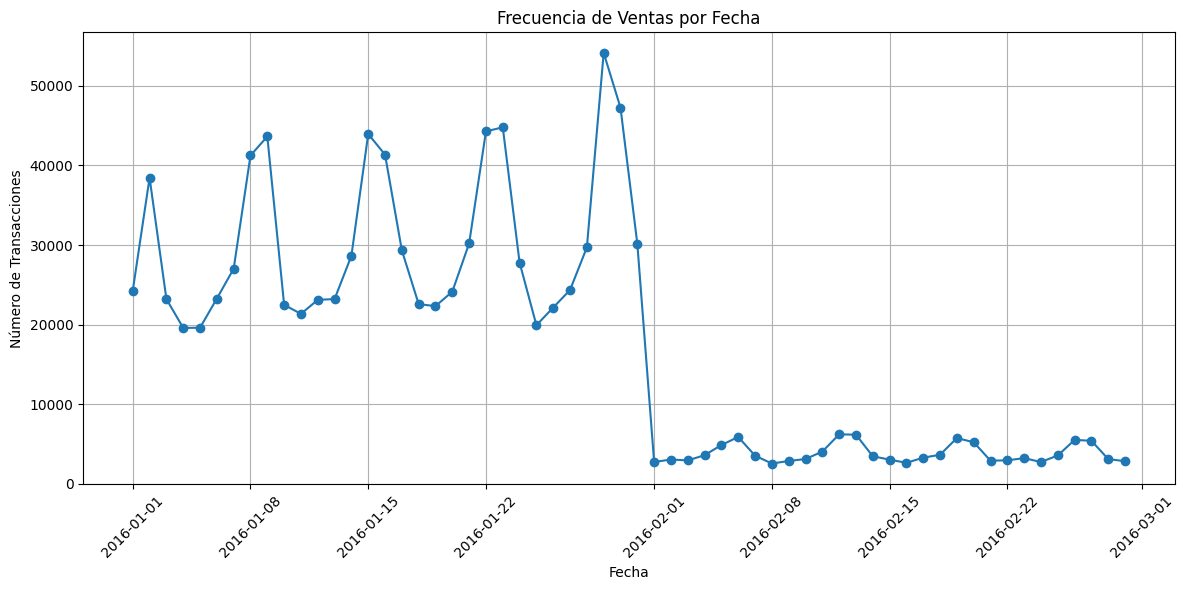

In [14]:
# Convertir 'SalesDate' a datetime si no se ha hecho antes
ventas['SalesDate'] = pd.to_datetime(ventas['SalesDate'])

# Contar las apariciones y luego ordenar por fecha
conteo_fechas = ventas['SalesDate'].value_counts().sort_index()

### Paso 2: Graficar

plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.plot(conteo_fechas.index, conteo_fechas.values, marker='o', linestyle='-')
plt.title('Frecuencia de Ventas por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Transacciones')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar espacio al contenido
plt.show()

In [1]:
import pyodbc

# Configura los detalles de la conexión usando la información proporcionada
server = 'JORGE\SQLEXPRESS'  # Nombre del servidor
database = 'DrinkinTeamDB'  # Nombre de la base de datos
username = 'datafusionlatam'  # Usuario
password = 'DAFTHENRY'  # Contraseña

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Intenta conectarte a la base de datos
try:
    conn = pyodbc.connect(connection_string)
    print("Conexión exitosa!")
except Exception as e:
    print("Ocurrió un error al intentar conectar a la base de datos:", e)



Ocurrió un error al intentar conectar a la base de datos: ('08001', '[08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]No existe el servidor SQL Server o se ha denegado el acceso al mismo. (17) (SQLDriverConnect); [08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]ConnectionOpen (Connect()). (53)')


In [2]:
import pyodbc

server = 'JORGE\SQLEXPRESS'  # Cambia esto por la dirección IP o el nombre de red del servidor de SQL Server de tu compañero
database = 'DrinkinTeamDB'
username = 'datafusionlatam'
password = 'DAFTHENRY'

connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
try:
    conn = pyodbc.connect(connection_string)
    print("Conexión exitosa!")
except Exception as e:
    print("Error al conectar a la base de datos:", e)


Error al conectar a la base de datos: ('08001', '[08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]No existe el servidor SQL Server o se ha denegado el acceso al mismo. (17) (SQLDriverConnect); [08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]ConnectionOpen (Connect()). (53)')


In [ ]:
p